# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (6/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk6.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,58620,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (735); CHEE...",3573,207.07,304.49,154.35,20.3,168.87,...,3,1.94,NaN,0.0,0.0,NaN,NaN,58620_NHANES_2009_2010,3573; 207.07; 304.49; 154.35; 20.3; 168.87,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,58643,2,"YOGURT, FRUIT VARIETY, LOWFAT MILK (183.75); C...",2123,125.61,225.69,103.17,23.7,81.24,...,3,5.00,NaN,0.0,0.0,0.0,NaN,58643_NHANES_2009_2010,2123; 125.61; 225.69; 103.17; 23.7; 81.24,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,58658,2,"GROUND BEEF, LESS THAN 80% LEAN, COOKED (141.3...",2264,66.28,357.56,176.99,17.9,66.70,...,3,5.00,NaN,0.0,0.0,NaN,NaN,58658_NHANES_2009_2010,2264; 66.28; 357.56; 176.99; 17.9; 66.7,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,58662,2,"MILK, COW'S, FLUID, 2% FAT (320.25); MILK, COW...",2176,69.32,345.08,115.50,21.7,62.07,...,3,1.47,NaN,0.0,0.0,NaN,NaN,58662_NHANES_2009_2010,2176; 69.32; 345.08; 115.5; 21.7; 62.07,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,58663,2,"MILK, COW'S, FLUID, 2% FAT (488); MILK, COW'S,...",2107,74.25,289.30,197.27,12.0,78.30,...,3,NaN,NaN,0.0,0.0,NaN,NaN,58663_NHANES_2009_2010,2107; 74.25; 289.3; 197.27; 12.0; 78.3,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,69004,2,"PORK BACON, NS AS TO FRESH/SMOKED/CURED, COOKE...",1825,54.67,333.70,176.16,9.1,32.04,...,1,0.02,NaN,0.0,0.0,0.0,NaN,69004_NHANES_2011_2012,1825; 54.67; 333.7; 176.16; 9.1; 32.04,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,69016,2,"MILK, COW'S, FLUID, WHOLE (122); CARRY-OUT MIL...",1354,44.15,191.61,94.25,10.4,47.78,...,4,0.00,NaN,0.0,0.0,NaN,NaN,69016_NHANES_2011_2012,1354; 44.15; 191.61; 94.25; 10.4; 47.78,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,69021,2,"MILK, COW'S, FLUID, WHOLE (244); ORANGE CHICKE...",2557,84.79,383.84,212.57,11.6,76.75,...,1,0.68,NaN,0.0,0.0,0.0,NaN,69021_NHANES_2011_2012,2557; 84.79; 383.84; 212.57; 11.6; 76.75,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1126,1126,69074,2,"MILK, COW'S, FLUID, WHOLE (244); MILK, COW'S, ...",2261,62.26,299.24,170.78,20.0,41.61,...,1,2.46,NaN,0.0,0.0,0.0,NaN,69074_NHANES_2011_2012,2261; 62.26; 299.24; 170.78; 20.0; 41.61,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 64. I.e., these rows need post-processing.
Consistent rows: 1064. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
35,35,58976,2,"MILK, COW'S, FLUID, 2% FAT (442.25); MILK, COW...",2238,99.44,321.38,170.89,11.5,63.33,...,3,0.00,NaN,0.0,0.0,0.0,NaN,58976_NHANES_2009_2010,2238; 99.44; 321.38; 170.89; 11.5; 63.33,USER:\n\nPlease analyze the patient's dietary ...
91,91,59511,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (444.06); M...",1905,101.69,221.13,114.99,12.6,69.13,...,5,NaN,NaN,0.0,0.0,NaN,NaN,59511_NHANES_2009_2010,1905; 101.69; 221.13; 114.99; 12.6; 69.13,USER:\n\nPlease analyze the patient's dietary ...
101,101,59557,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (107.19); P...",2279,85.63,312.21,164.28,16.5,83.12,...,4,5.00,NaN,0.0,0.0,NaN,NaN,59557_NHANES_2009_2010,2279; 85.63; 312.21; 164.28; 16.5; 83.12,USER:\n\nPlease analyze the patient's dietary ...
139,139,59883,2,"MILK, COW'S, FLUID, WHOLE (350.75); CHEESE,CHE...",1427,52.47,146.13,51.29,4.4,69.46,...,3,0.87,NaN,0.0,0.0,0.0,NaN,59883_NHANES_2009_2010,1427; 52.47; 146.13; 51.29; 4.4; 69.46,USER:\n\nPlease analyze the patient's dietary ...
168,168,60099,2,"FRUIT SMOOTHIE DRINK, W/ FRUIT OR JUICE & DAIR...",493,24.17,74.69,33.89,4.3,11.20,...,1,1.64,NaN,0.0,0.0,NaN,NaN,60099_NHANES_2009_2010,493; 24.17; 74.69; 33.89; 4.3; 11.2,USER:\n\nPlease analyze the patient's dietary ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1037,68280,2,"PIZZA, CHEESE, FROM SCHOOL LUNCH, THIN CRUST (...",624,23.45,101.02,39.00,5.7,14.04,...,3,2.60,NaN,0.0,0.0,NaN,NaN,68280_NHANES_2011_2012,624; 23.45; 101.02; 39.0; 5.7; 14.04,USER:\n\nPlease analyze the patient's dietary ...
1050,1050,68350,2,"MILK, COW'S, FLUID, 2% FAT (442.25); CHEESE, P...",2397,68.42,325.03,143.50,17.2,95.39,...,3,4.56,NaN,0.0,0.0,NaN,NaN,68350_NHANES_2011_2012,2397; 68.42; 325.03; 143.5; 17.2; 95.39,USER:\n\nPlease analyze the patient's dietary ...
1052,1052,68360,2,"MILK, COW'S, FLUID, 2% FAT (122); CHICKEN, GRO...",856,53.17,102.24,62.16,3.8,26.19,...,5,NaN,NaN,0.0,0.0,NaN,NaN,68360_NHANES_2011_2012,856; 53.17; 102.24; 62.16; 3.8; 26.19,USER:\n\nPlease analyze the patient's dietary ...
1060,1060,68459,2,"YOGURT, FRUIT VARIETY, WHOLE MILK (64); CHEESE...",2068,91.64,214.45,66.14,15.5,95.20,...,4,1.53,NaN,0.0,0.0,0.0,NaN,68459_NHANES_2011_2012,2068; 91.64; 214.45; 66.14; 15.5; 95.2,USER:\n\nPlease analyze the patient's dietary ...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1064, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,58620,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (735); CHEE...",3573,207.07,304.49,154.35,20.3,168.87,...,NaN,58620_NHANES_2009_2010,3573; 207.07; 304.49; 154.35; 20.3; 168.87,3336; 199.15; 319.1; 171.1; 17.9; 138.3,3336,199.15,319.10,171.10,17.9,138.30
1,1,58643,2,"YOGURT, FRUIT VARIETY, LOWFAT MILK (183.75); C...",2123,125.61,225.69,103.17,23.7,81.24,...,NaN,58643_NHANES_2009_2010,2123; 125.61; 225.69; 103.17; 23.7; 81.24,2437; 134.85; 274.1; 115.85; 22.3; 93.1,2437,134.85,274.10,115.85,22.3,93.10
2,2,58658,2,"GROUND BEEF, LESS THAN 80% LEAN, COOKED (141.3...",2264,66.28,357.56,176.99,17.9,66.70,...,NaN,58658_NHANES_2009_2010,2264; 66.28; 357.56; 176.99; 17.9; 66.7,2511; 72.1; 380.1; 169.21; 17.3; 78.3,2511,72.10,380.10,169.21,17.3,78.30
3,3,58662,2,"MILK, COW'S, FLUID, 2% FAT (320.25); MILK, COW...",2176,69.32,345.08,115.50,21.7,62.07,...,NaN,58662_NHANES_2009_2010,2176; 69.32; 345.08; 115.5; 21.7; 62.07,2531; 84.1; 380.7; 126.29; 22.0; 76.9,2531,84.10,380.70,126.29,22.0,76.90
4,4,58663,2,"MILK, COW'S, FLUID, 2% FAT (488); MILK, COW'S,...",2107,74.25,289.30,197.27,12.0,78.30,...,NaN,58663_NHANES_2009_2010,2107; 74.25; 289.3; 197.27; 12.0; 78.3,2339; 75.67; 331.82; 211.1; 11.3; 84.71,2339,75.67,331.82,211.10,11.3,84.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,69004,2,"PORK BACON, NS AS TO FRESH/SMOKED/CURED, COOKE...",1825,54.67,333.70,176.16,9.1,32.04,...,NaN,69004_NHANES_2011_2012,1825; 54.67; 333.7; 176.16; 9.1; 32.04,1746; 54.82; 310.8; 173.1; 7.3; 36.4,1746,54.82,310.80,173.10,7.3,36.40
1124,1124,69016,2,"MILK, COW'S, FLUID, WHOLE (122); CARRY-OUT MIL...",1354,44.15,191.61,94.25,10.4,47.78,...,NaN,69016_NHANES_2011_2012,1354; 44.15; 191.61; 94.25; 10.4; 47.78,1448; 49.82; 191.28; 85.13; 9.7; 56.48,1448,49.82,191.28,85.13,9.7,56.48
1125,1125,69021,2,"MILK, COW'S, FLUID, WHOLE (244); ORANGE CHICKE...",2557,84.79,383.84,212.57,11.6,76.75,...,NaN,69021_NHANES_2011_2012,2557; 84.79; 383.84; 212.57; 11.6; 76.75,2611; 80.1; 390.8; 211.1; 9.7; 80.9,2611,80.10,390.80,211.10,9.7,80.90
1126,1126,69074,2,"MILK, COW'S, FLUID, WHOLE (244); MILK, COW'S, ...",2261,62.26,299.24,170.78,20.0,41.61,...,NaN,69074_NHANES_2011_2012,2261; 62.26; 299.24; 170.78; 20.0; 41.61,2416; 75.56; 344.8; 201.1; 20.3; 53.9,2416,75.56,344.80,201.10,20.3,53.90


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,63258.8271,181.7180,0.1052,251.5131,0.9307
DRxIPROT,172.3885,8.5485,0.1288,13.1297,0.9141
DRxICARB,1324.9725,27.0102,0.1244,36.4002,0.9121
DRxISUGR,534.1476,14.9370,0.1634,23.1116,0.8927
DRxIFIBE,10.8581,2.2326,0.1631,3.2952,0.8514
DRxITFAT,245.3016,10.4578,0.1661,15.6621,0.8750


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-5.634467,2.250000e-08
DRxIPROT,-5.818779,7.800000e-09
DRxICARB,-9.399127,0.000000e+00
DRxISUGR,-0.404667,6.858035e-01
DRxIFIBE,10.935373,0.000000e+00
DRxITFAT,1.587407,1.127178e-01


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

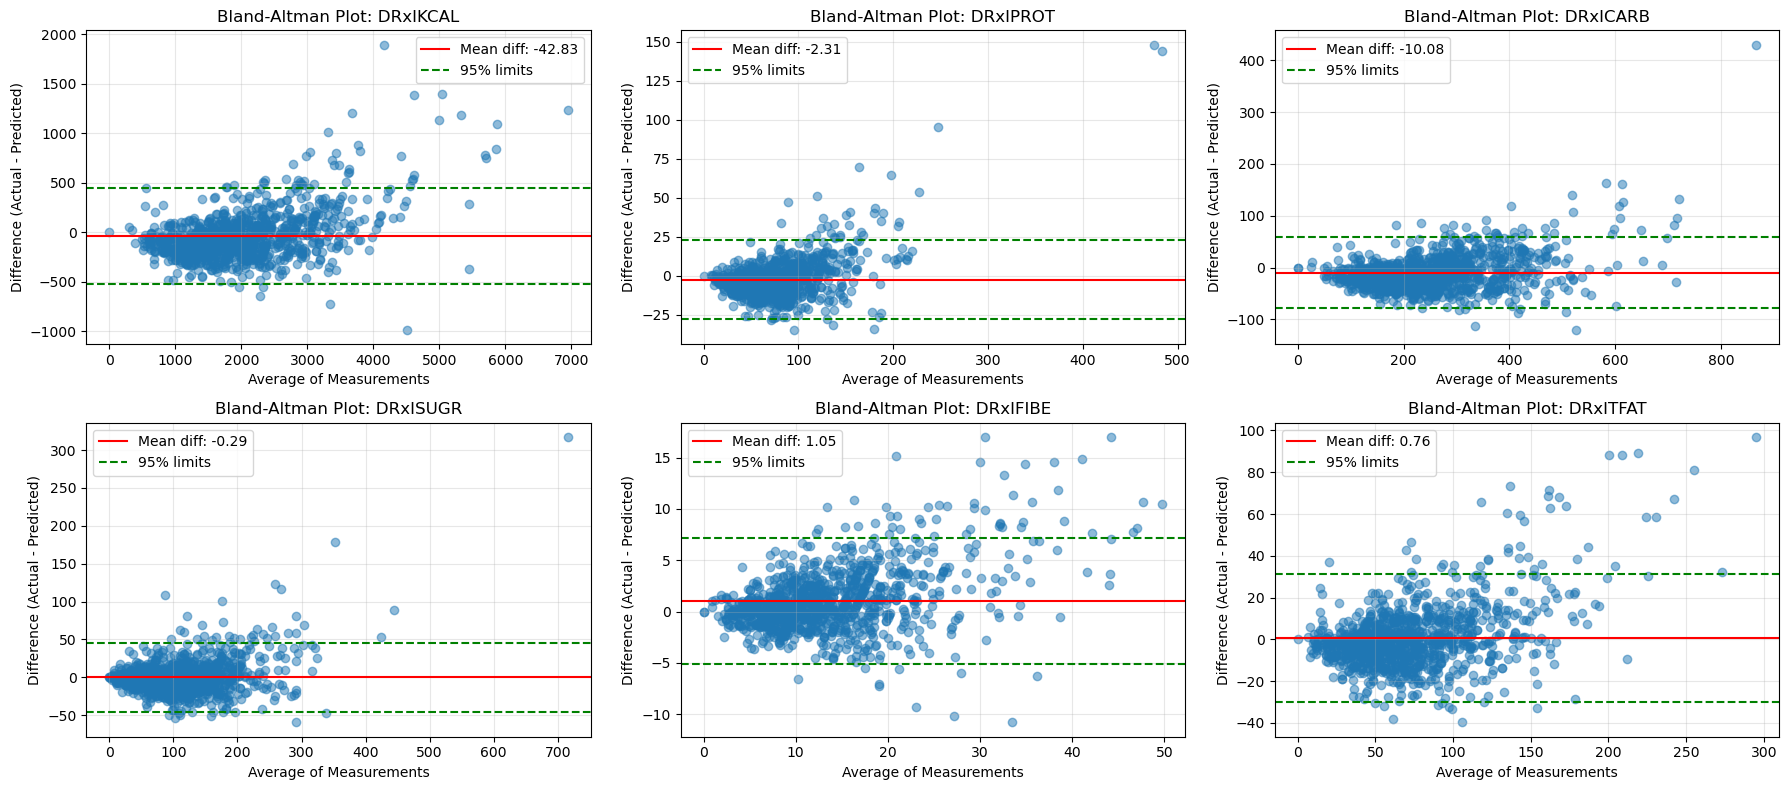

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.950173
DRxICARB 0.939017
DRxIPROT 0.934103
DRxISUGR 0.933272
DRxITFAT 0.913590
DRxIFIBE 0.885397

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9912


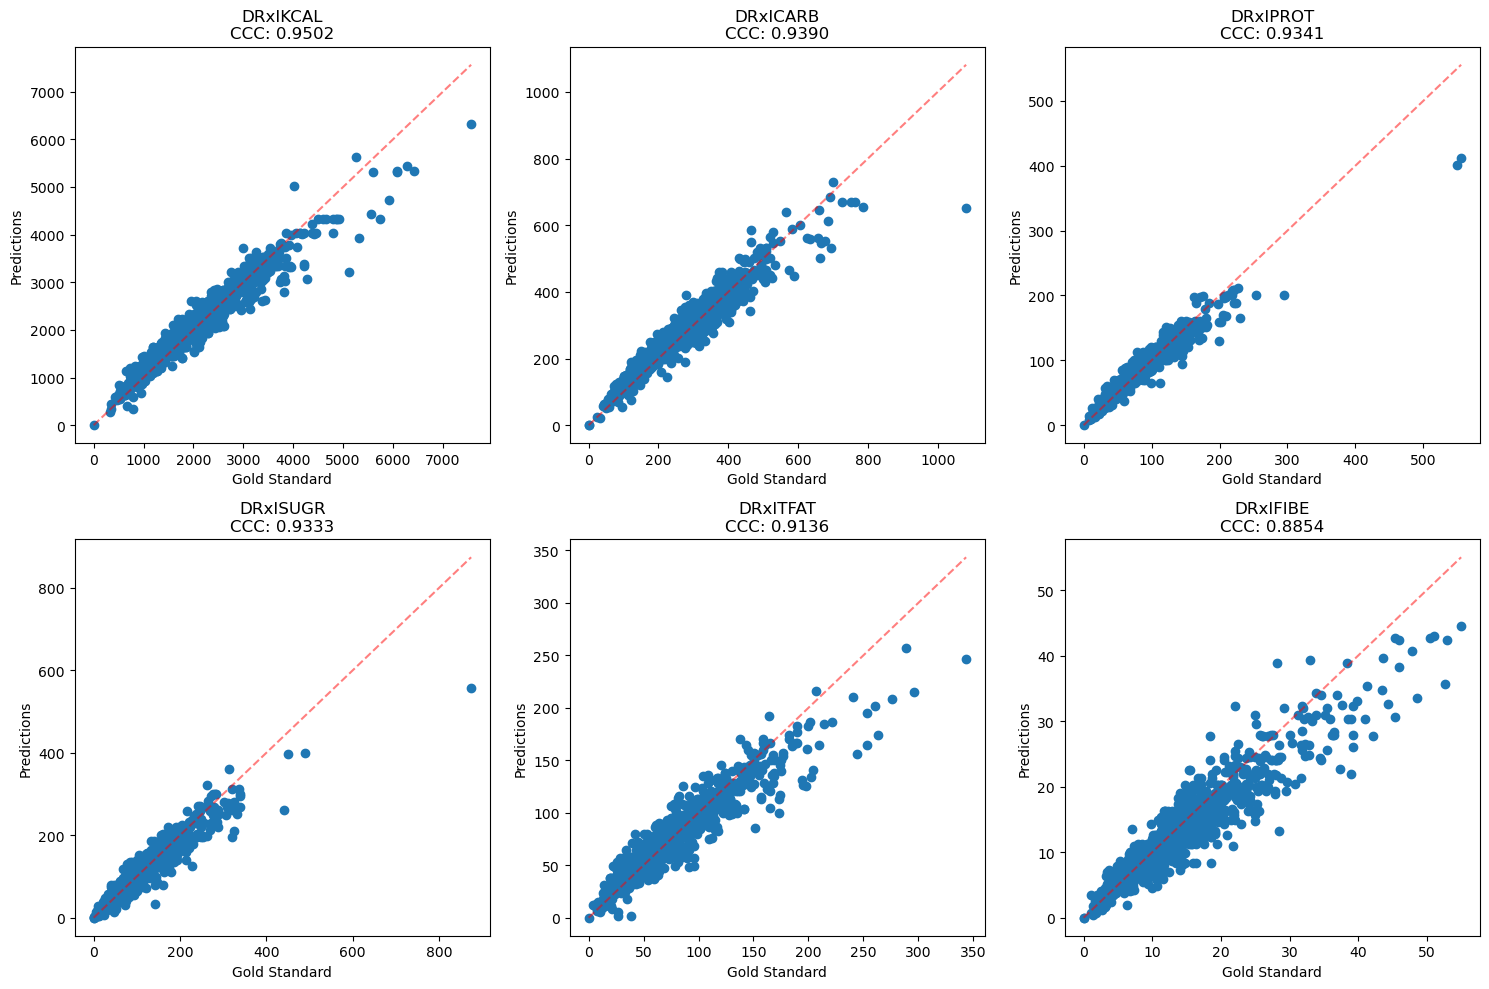

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()